In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

# Data Analysis & Visualization

In [7]:
insurance = pd.read_csv('insurance.csv')

In [8]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Categorical Features 1. sex 2. smoker 3.region
# chking for missing values

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


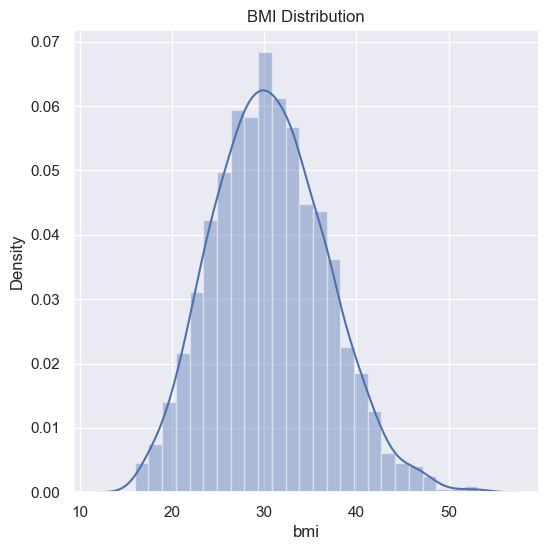

In [15]:
# distribution of bmi values

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

In [17]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

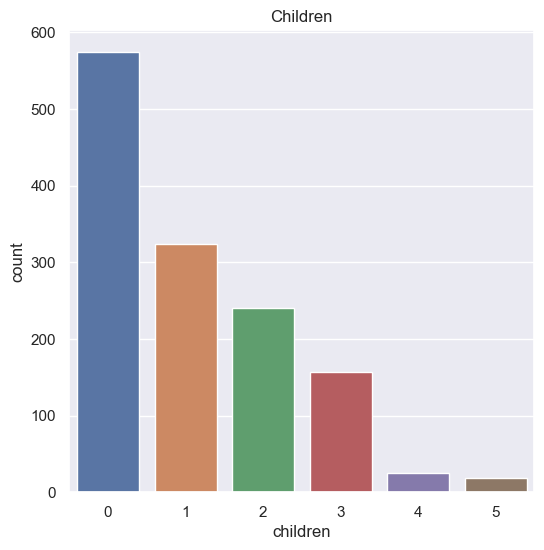

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()

In [23]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

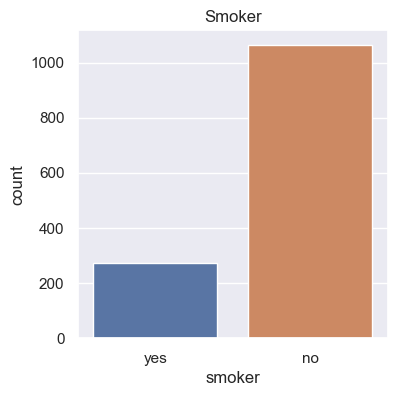

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=insurance)
plt.title('Smoker')
plt.show()

In [25]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

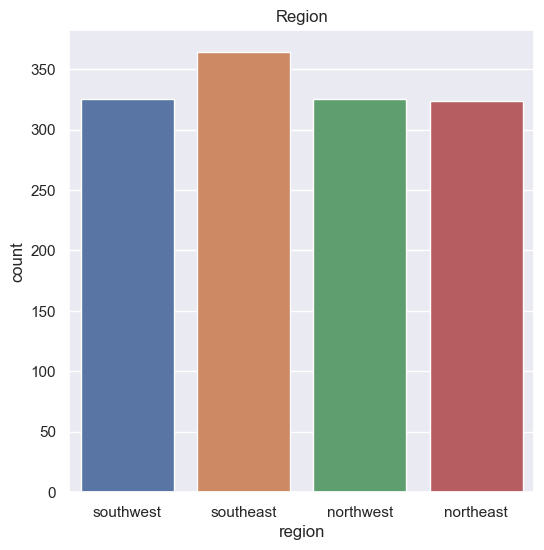

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance)
plt.title('Region')
plt.show()

In [28]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


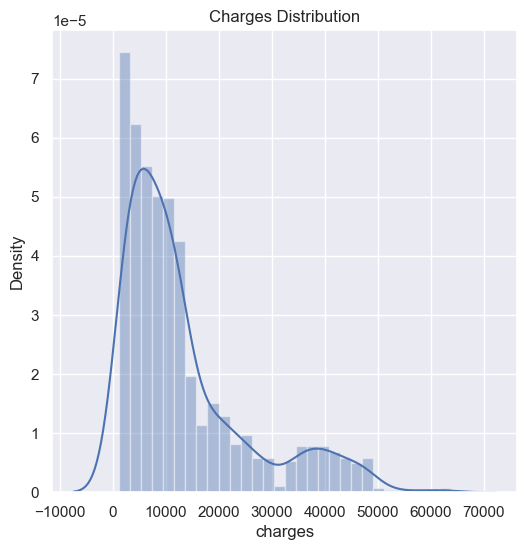

In [30]:

plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charges Distribution')
plt.show()

# Data pre processing

In [40]:
# encoding 'sex' coloumn
insurance.replace({'sex':{'female':0,'male':1}}, inplace=True)

# encoding 'smoker' coloumn
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#encoding 'region' coloumn
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [41]:
# Spliting the features and target
X=insurance.drop(columns='charges',axis=1)
Y=insurance['charges']

In [42]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [43]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [44]:
# Splitting the data into train test data

x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [46]:
X.shape,x_train.shape,x_test.shape

((1338, 6), (1070, 6), (268, 6))

# Model Traing

In [47]:
# Linear Regression 
    # Y=mX+c
    
        # x= input feature
        # y= prediction Probability
        # M= slope
        # C = Intercept
# Loading the linear regression model

regressor=LinearRegression()

In [48]:
regressor.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [49]:
# Prediction on training data 

traing_data_prediction = regressor.predict(x_train)

In [50]:
r2_train= metrics.r2_score(y_train,traing_data_prediction)

In [51]:
print('R Squared value is:',r2_train)

R Squared value is: 0.751505643411174


In [52]:
test_data_prediction=regressor.predict(x_test)

In [53]:
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R Squared value is:',r2_test)

R Squared value is: 0.7447273869684076


In [54]:
input_data=(23,2,26.76,0,1,1)
in_da_as_np_array = np.asarray(input_data)

in_da_reshaped=in_da_as_np_array.reshape(1,-1)

prediction= regressor.predict(in_da_reshaped)

print(prediction)

[2246.08700779]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
print('The Insurance cost in USD is:',prediction[0])

The Insurance cost in USD is: 2246.0870077876043
